# Homework 2

## Task 1. Maximization of Functions using Gradient Ascent

**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.



Argmax:
-1.5256863832473755


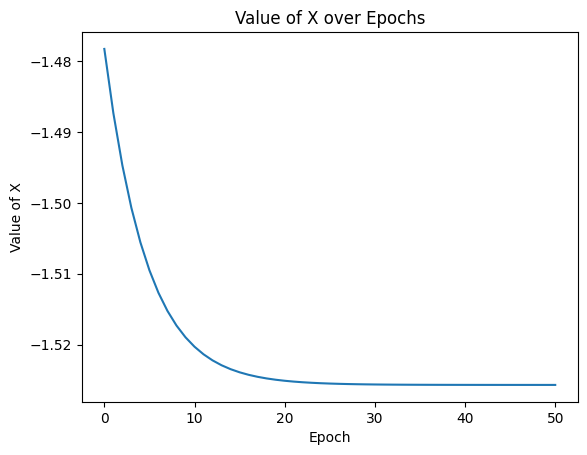

In [ ]:
# Necessary imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x): return -x**4 + 4*x**2 - 2*x + 1

# Setting number of experiments (to increase odds of finding global maximum instead of local maximum) and number of epochs
num_epochs = 50
num_experiments = 25

# Running experiments
x_res = 0
consecutive_x_res = []

for i in range(num_experiments):
  x = torch.randn(1, requires_grad=True)
  optimizer = torch.optim.SGD([x], lr=0.01, maximize=True)
  consecutive_x = [float(x[0])]

  for epoch in range(num_epochs):
      loss = f(x)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      consecutive_x.append(float(x[0]))

  if f(float(x[0])) > f(x_res):
    x_res = float(x[0])
    consecutive_x_res = consecutive_x

# Plotting results
print(f"Argmax:\n{x_res}")
plt.plot(range(num_epochs + 1), consecutive_x_res)
plt.title("Value of X over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Value of X")
plt.show()

**Task**:
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.

Results:
X = -16.375085830688477, Y = -18.662004470825195, Z = 9.687542915344238


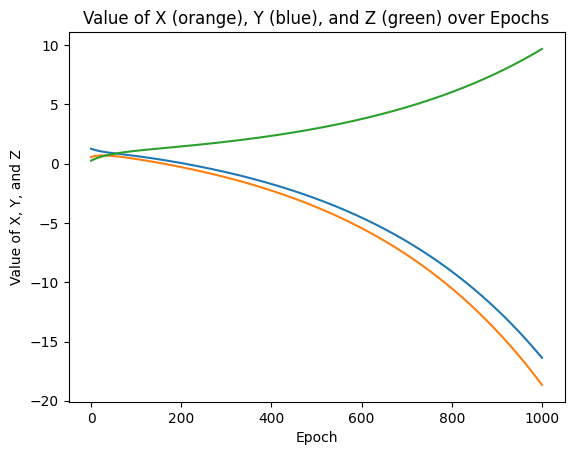


3D projection of the path


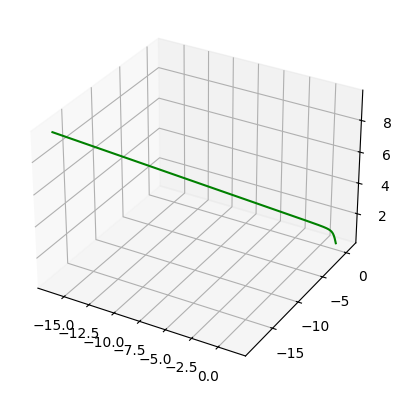

In [ ]:
# Function definition
def f(params):
  x, y, z = params
  return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

# Setting number of epochs
num_epochs = 1000

# Running experiment
params = torch.randn(3, requires_grad=True)
optimizer = torch.optim.SGD([params], lr=0.01, maximize=True)

consecutive_params = [[float(params[i]) for i in range(3)]]

for epoch in range(num_epochs):
    loss = f(params)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    consecutive_params.append([float(params[i]) for i in range(3)])

# Plotting results
print(f"Results:\nX = {params[0]}, Y = {params[1]}, Z = {params[2]}")
plt.plot(range(num_epochs+1), [params[0] for params in consecutive_params])
plt.plot(range(num_epochs+1), [params[1] for params in consecutive_params])
plt.plot(range(num_epochs+1), [params[2] for params in consecutive_params])
plt.title("Value of X (orange), Y (blue), and Z (green) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Value of X, Y, and Z")
plt.show()
fig = plt.figure()
print("\n3D projection of the path")
ax = plt.axes(projection='3d')
ax.plot3D(*[ [params[i] for params in consecutive_params] for i in range(3)], 'green')
plt.show()

We can see that this path doesn't converge to any value, which suggests that this function may not have a maximum. Indeed, consulting WolframAlpha confirms this hypothesis.

## Task 2. Linear Regression in PyTorch

**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:

In [ ]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
Y = 3 * X + 4 + epsilon

**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error.

Learned W: 2.9996845722198486
Learned b: 4.019050121307373


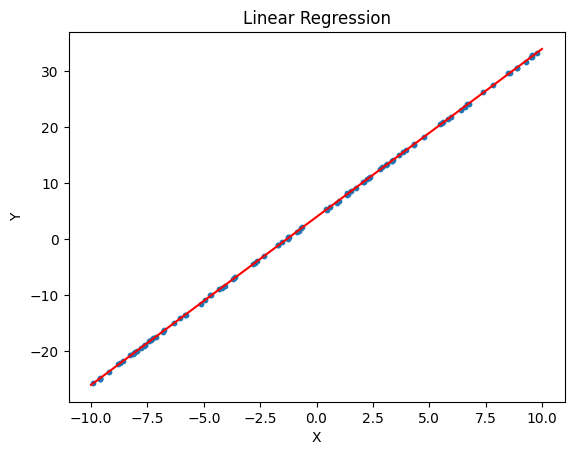

In [ ]:
# Setting number of epochs and random initial values of parameters
num_epochs = 1000

W = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Some technical difficulties solved
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# Linear regression
optimizer = torch.optim.SGD([W, b], lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(num_epochs):
    Y_pred = W * X + b
    loss = loss_fn(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting results
print(f"Learned W: {W[0]}")
print(f"Learned b: {b[0]}")

X_lin = torch.linspace(-10, 10, 100)
y_true = W.detach() * X_lin + b.detach()
plt.plot(X_lin.numpy(), y_true.numpy(), label='Learned Line', color="red")
plt.scatter(X, Y, s=10)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Task 3. Learning Rate Analysis

**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.

Learned W: 2.9996845722198486
Learned b: 4.019050121307373


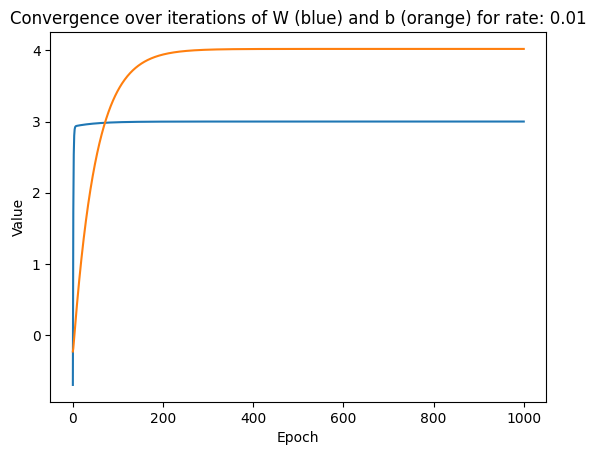

Learned W: -7.971836300137259e+36
Learned b: 1.3325211341668619e+35


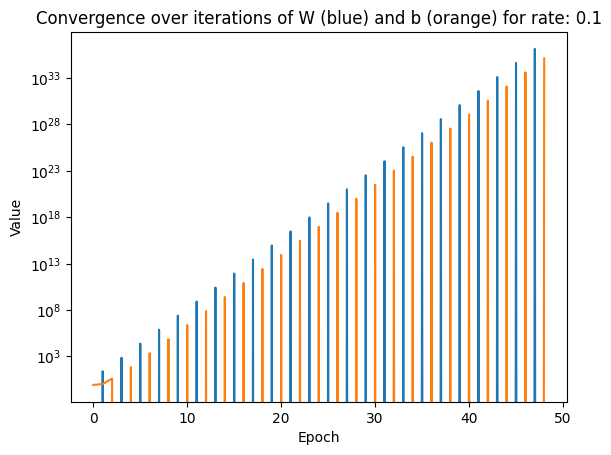

Learned W: -1.0428060822326181e+37
Learned b: 1.743087909603984e+35


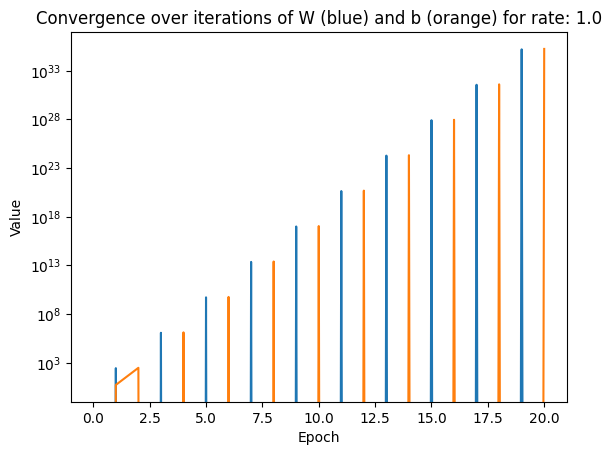

In [ ]:
import math

# Setting number of epochs
num_epochs = 1000

# Iterating over different learning rates
learning_rates = [0.01, 0.1, 1.0]
for rate in learning_rates:

  # Setting random initial values of parameters
  W = torch.randn(1, requires_grad=True)
  b = torch.randn(1, requires_grad=True)

  # Linear regression
  optimizer = torch.optim.SGD([W, b], lr=rate)
  loss_fn = nn.MSELoss()

  Ws = [float(W[0])]
  bs = [float(b[0])]

  flag = False
  for epoch in range(num_epochs):
      Y_pred = W * X + b
      loss = loss_fn(Y_pred, Y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if math.isnan(W) or math.isnan(b) or math.isinf(W) or math.isinf(b):
        flag = True
        break

      Ws.append(float(W[0]))
      bs.append(float(b[0]))

  # Plotting results
  print(f"Learned W: {Ws[-1]}")
  print(f"Learned b: {bs[-1]}")

  plt.plot(range(len(Ws)), Ws)
  plt.plot(range(len(bs)), bs)
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  if flag:
    plt.yscale("log")
  plt.title(f"Convergence over iterations of W (blue) and b (orange) for rate: {rate}")
  plt.show()

For learning rates of 0.1 and 1.0, the values of W and b do not converge. We observe that they alternate between positive and negative values and grow exponentially (note the logarithmic scale). However, for a learning rate of 0.01, everything appears to work correctly, with the values converging smoothly to the true values.

## Task 4. Polynomial Regression Extension

**Dataset**: Use the following code to create a dataset of 100 samples:

In [ ]:
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
Y = 3 * X**3 - 2 * X**2 + 5 + epsilon

**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.

Learned W3: 2.9952354431152344
Learned W2: -1.863935947418213
Learned W1: 0.08839862793684006
Learned b: 3.0005722045898438


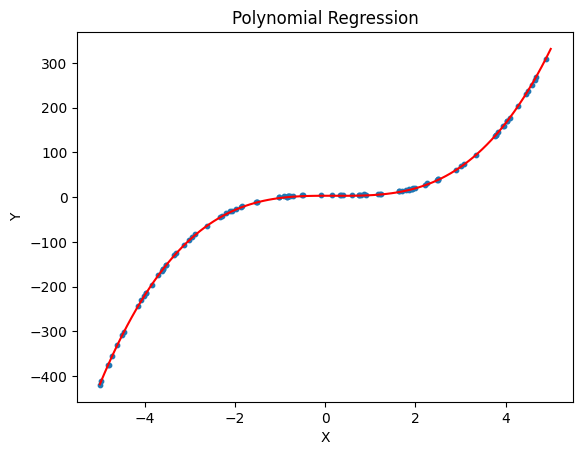

In [ ]:
# Setting number of epochs and random initial values of parameters
num_epochs = 10000

W1 = torch.randn(1, requires_grad=True)
W2 = torch.randn(1, requires_grad=True)
W3 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Some technical difficulties solved
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# Linear regression
optimizer = torch.optim.SGD([W1, W2, W3, b], lr=0.0001)
loss_fn = nn.MSELoss()

for epoch in range(num_epochs):
    Y_pred = W3 * X**3 + W2 * X**2 + W1 * X + b
    loss = loss_fn(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

# Plotting results
print(f"Learned W3: {W3[0]}")
print(f"Learned W2: {W2[0]}")
print(f"Learned W1: {W1[0]}")
print(f"Learned b: {b[0]}")
X_lin = torch.linspace(-5, 5, 100)
y_true = W3.detach() * X_lin**3 + W2.detach() * X_lin**2 + W1.detach() * X_lin + b.detach()
plt.plot(X_lin.numpy(), y_true.numpy(), label='Learned Line', color="red")
plt.scatter(X, Y, s=10)
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# Setting number of epochs and random initial values of parameters
num_epochs = 10000

W = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Linear regression
optimizer = torch.optim.SGD([W, b], lr=0.0001)
loss_fn = nn.MSELoss()

for epoch in range(num_epochs):
    Y_pred = W * X + b
    loss_1d = loss_fn(Y_pred, Y)
    optimizer.zero_grad()
    loss_1d.backward()
    optimizer.step()

# Printing value of loss function for both cases
print(f"Loss for polynomial regression: {float(loss.item())}")
print(f"Loss for linear regression: {float(loss_1d.item())}")


Loss for polynomial regression: 1.9126570224761963
Loss for linear regression: 3621.1484375


We can see that in this case loss for polynomial regression is significantly lower, which is expected since we chose better model.

## Task 5. Overfitting and Regularization

**Dataset**: Use the following code to generate a dataset with 150 samples:

In [ ]:
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
Y = 2 * X**2 + 3 * X + 1 + epsilon

**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.

Loss for Linear Regression (Train): 3569.5478
Loss for Linear Regression (Validation): 2841.5818
Loss for Polynomial Regression (Degree 10, No Regularization) (Train): 0.8695
Loss for Polynomial Regression (Degree 10, No Regularization) (Validation): 1.4054
Loss for Polynomial Regression (Degree 10, L2 Regularization) (Train): 0.8702
Loss for Polynomial Regression (Degree 10, L2 Regularization) (Validation): 1.4051


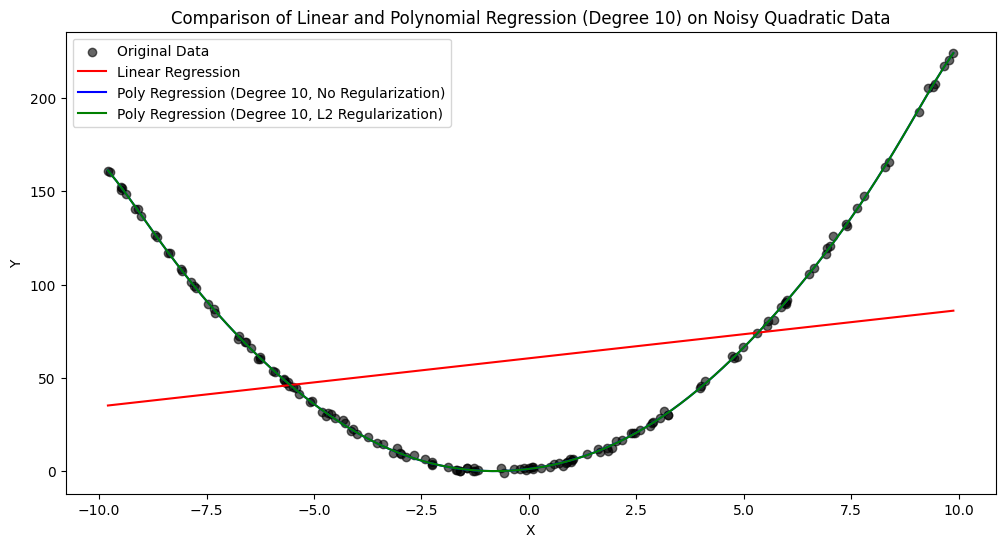

In [ ]:
# Warning ignoring for clear printing in this task
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action="ignore", category=LinAlgWarning)

# Necessary imports for this task
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Function to expand input for polynomial regression
def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

# Polynomial Regression Class with L2 Regularization
class PolyRegression:
    def __init__(self, degree, alpha=0.0):
        self.degree = degree
        self.alpha = alpha  # Regularization strength (L2 penalty)
        self.coef_ = None  # To store learned coefficients

    def fit(self, x, y):
        X_expanded = expand(x, self.degree)
        if self.alpha > 0:
            # Apply L2 regularization to the coefficients during training (Ridge regression)
            model = Ridge(alpha=self.alpha, fit_intercept=False)
            model.fit(X_expanded, y)
            self.coef_ = model.coef_
        else:
            # Standard polynomial regression without regularization
            model = LinearRegression(fit_intercept=False)
            model.fit(X_expanded, y)
            self.coef_ = model.coef_

    def predict(self, x):
        X_expanded = expand(x, self.degree)
        return X_expanded @ self.coef_

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=124)

# Fit and evaluate the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train.reshape(-1, 1), Y_train)
Y_train_pred_lin = linear_model.predict(X_train.reshape(-1, 1))
Y_val_pred_lin = linear_model.predict(X_val.reshape(-1, 1))

# Fit and evaluate the Polynomial Regression model (degree 10 without regularization)
poly_model_no_reg = PolyRegression(degree=10)
poly_model_no_reg.fit(X_train, Y_train)
Y_train_pred_poly_no_reg = poly_model_no_reg.predict(X_train)
Y_val_pred_poly_no_reg = poly_model_no_reg.predict(X_val)

# Fit and evaluate the Polynomial Regression model (degree 10 with L2 regularization)
poly_model_with_reg = PolyRegression(degree=10, alpha=0.6)
poly_model_with_reg.fit(X_train, Y_train)
Y_train_pred_poly_with_reg = poly_model_with_reg.predict(X_train)
Y_val_pred_poly_with_reg = poly_model_with_reg.predict(X_val)

# Calculate Mean Squared Error for both training and validation sets
mse_train_lin = mean_squared_error(Y_train, Y_train_pred_lin)
mse_val_lin = mean_squared_error(Y_val, Y_val_pred_lin)

mse_train_poly_no_reg = mean_squared_error(Y_train, Y_train_pred_poly_no_reg)
mse_val_poly_no_reg = mean_squared_error(Y_val, Y_val_pred_poly_no_reg)

mse_train_poly_with_reg = mean_squared_error(Y_train, Y_train_pred_poly_with_reg)
mse_val_poly_with_reg = mean_squared_error(Y_val, Y_val_pred_poly_with_reg)

print(f"Loss for Linear Regression (Train): {mse_train_lin:.4f}")
print(f"Loss for Linear Regression (Validation): {mse_val_lin:.4f}")
print(f"Loss for Polynomial Regression (Degree 10, No Regularization) (Train): {mse_train_poly_no_reg:.4f}")
print(f"Loss for Polynomial Regression (Degree 10, No Regularization) (Validation): {mse_val_poly_no_reg:.4f}")
print(f"Loss for Polynomial Regression (Degree 10, L2 Regularization) (Train): {mse_train_poly_with_reg:.4f}")
print(f"Loss for Polynomial Regression (Degree 10, L2 Regularization) (Validation): {mse_val_poly_with_reg:.4f}")

# Plot the original data, linear regression, and polynomial fits
plt.figure(figsize=(12, 6))

# Plot original data
plt.scatter(X, Y, color='black', alpha=0.6, label="Original Data")

# Plot Linear regression
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_range_lin = linear_model.predict(X_range)
plt.plot(X_range, Y_range_lin, label="Linear Regression", color='red')

# Plot Polynomial regression without regularization
Y_range_poly_no_reg = poly_model_no_reg.predict(X_range)
plt.plot(X_range, Y_range_poly_no_reg, label="Poly Regression (Degree 10, No Regularization)", color='blue')

# Plot Polynomial regression with L2 regularization
Y_range_poly_with_reg = poly_model_with_reg.predict(X_range)
plt.plot(X_range, Y_range_poly_with_reg, label="Poly Regression (Degree 10, L2 Regularization)", color='green')

plt.title("Comparison of Linear and Polynomial Regression (Degree 10) on Noisy Quadratic Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


I decided to split the data into a training set containing 70% of the observations and a validation set. We can see that the difference between polynomial regression with and without regularization is barely noticeable, and overfitting doesn't occur in this example. This is due to the large size of the dataset (150 samples) and the low standard deviation of errors. However, there are two crucial observations:

- The loss for the training set is slightly higher with L2 regularization.
- The loss for the validation set is slightly lower with L2 regularization.

This is expected behavior—the purpose of regularization is to make the model fit the training data slightly worse in favor of keeping the coefficients more stable.

The linear model obviously doesn't fit the data well.


## Task 6. Custom Gradient Descent

**Dataset**: Use the same dataset from Problem 2.

In [ ]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
Y = 3 * X + 4 + epsilon

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.

Learned W: 2.999684162286506
Learned b: 4.019061068828265


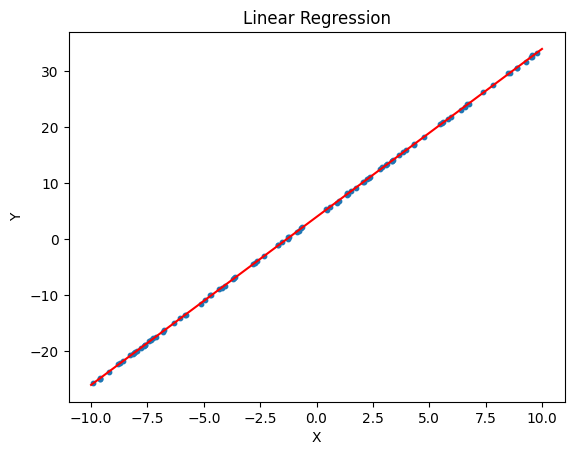

In [ ]:
# Setting number of epochs and random initial values of parameters
num_epochs = 1000

W = np.random.normal(0, 1, 1)[0]
b = np.random.normal(0, 1, 1)[0]

def MSE(Y_pred, Y):
  return sum((Y_pred - Y)**2)/ len(Y_pred)

# Linear regression
learning_rate = 0.01

for epoch in range(num_epochs):

    Y_pred = W * X + b
    loss = MSE(Y_pred, Y)

    epsilon = 0.000001

    Y_pred_prim = (W + epsilon) * X + b
    loss_prim = MSE(Y_pred_prim, Y)
    gradient_W = (loss_prim - loss) / epsilon

    Y_pred_prim = W * X + b + epsilon
    loss_prim = MSE(Y_pred_prim, Y)
    gradient_b = (loss_prim - loss) / epsilon

    W -= gradient_W * learning_rate
    b -= gradient_b * learning_rate

# Plotting results
print(f"Learned W: {W}")
print(f"Learned b: {b}")

X_lin = torch.linspace(-10, 10, 100)
y_true = W * X_lin + b
plt.plot(X_lin.numpy(), y_true.numpy(), label='Learned Line', color="red")
plt.scatter(X, Y, s=10)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Comparing the results to those from Task 2 (Learned W : 2.9996845722198486, Learned b : 4.019050121307373), we can see that they are very similar (the first difference appears at the 7th decimal place for W and the 5th decimal place for b). This assures us that our custom gradient descent implementation works correctly.

## Task 7. Dataset Size and Convergence

**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:

In [ ]:
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    Y = 4 * X - 3 + epsilon
    datasets.append((X, Y))

**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.

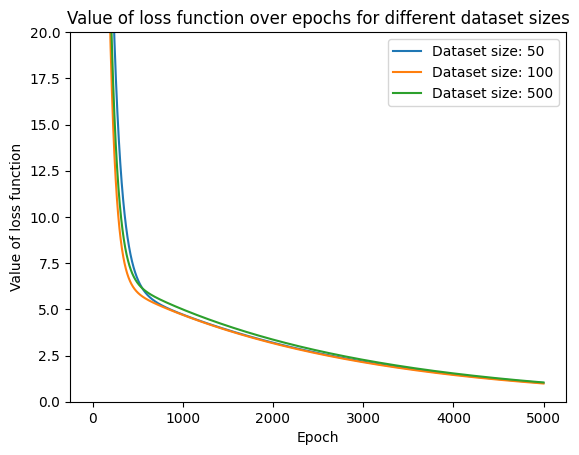

In [ ]:
# Setting number of epochs and random initial values of parameters
num_epochs = 5000

# Linear regression
loss_fn = nn.MSELoss()

for i in range(3):
  dataset = datasets[i]

  # We want to compare results when starting form the same W and b values
  torch.manual_seed(0)
  W = torch.randn(1, requires_grad=True)
  b = torch.randn(1, requires_grad=True)

  optimizer = torch.optim.SGD([W, b], lr=0.0001)

  X, Y = dataset
  # Some technical difficulties solved
  X = torch.tensor(X, dtype=torch.float32)
  Y = torch.tensor(Y, dtype=torch.float32)

  losses = []
  for epoch in range(num_epochs):
    Y_pred = W * X + b
    loss = loss_fn(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

  # Plotting results
  plt.plot(range(len(losses)), losses, label=f'Dataset size: {len(X)}')

plt.title("Value of loss function over epochs for different dataset sizes")
plt.ylabel("Value of loss function")
plt.xlabel("Epoch")
plt.legend()
plt.ylim(0, 20)
plt.show()

We can see that these paths are relatively similar (please note that I always start with the same W and b to eliminate the random factor of initialization). We can conclude that, in this case, the size of the dataset doesn't significantly matter. This is because the only difference lies in the loss function, which is the mean of squared errors. Since the original data is close to linear, 50 points are more than enough to approximate the true loss.

## Task 8. Effect of Model Complexity on Overfitting

**Dataset**: Use the following code to generate a dataset of 200 samples:

In [ ]:
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
Y = 2 * X**2 + X + epsilon

**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.

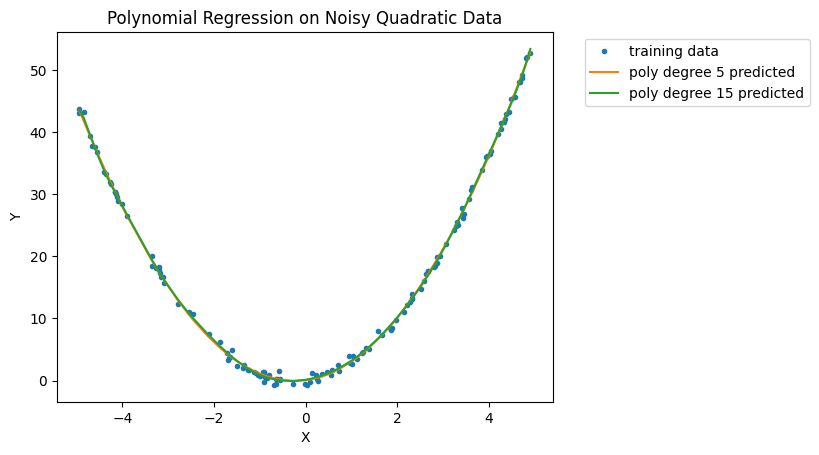

Loss for Polynomial Regression (Degree 5) (Train): 0.2835
Loss for Polynomial Regression (Degree 5) (Validation): 0.2078
Loss for Polynomial Regression (Degree 15) (Train): 0.2560
Loss for Polynomial Regression (Degree 15) (Validation): 0.2517


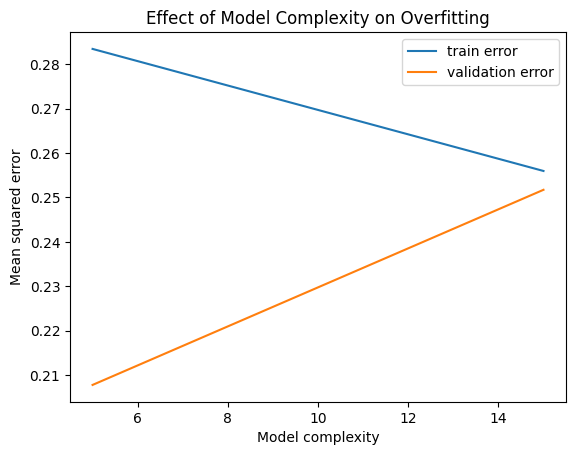

In [ ]:
# Function to expand input for polynomial regression
def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

# Polynomial Regression Class
class PolyRegression(LinearRegression):
    def __init__(self, degree):
        self.degree = degree
        super().__init__(fit_intercept=False)  # Don't fit intercept, as we add the 0-th power explicitly

    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree))

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=124)

# Sort X to make the plot smooth
sorted_indices = np.argsort(X_train)
X_sorted = X_train[sorted_indices]
Y_sorted = Y_train[sorted_indices]

# Plot the original data
plt.plot(X_sorted, Y_sorted, '.', label='training data')
mse_trains = []
mse_vals = []

# Fit and plot polynomial models of different degrees
for degree in [5, 15]:
    model = PolyRegression(degree).fit(X_sorted, Y_sorted)
    plt.plot(X_sorted, model.predict(X_sorted), '-', label=f'poly degree {degree} predicted')

    # Calculate Mean Squared Error for both training and validation sets
    Y_train_pred = model.predict(X_train.reshape(-1, 1))
    Y_val_pred = model.predict(X_val.reshape(-1, 1))
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_val = mean_squared_error(Y_val, Y_val_pred)
    mse_trains.append(mse_train)
    mse_vals.append(mse_val)

# Plot results
plt.title('Polynomial Regression on Noisy Quadratic Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(f"Loss for Polynomial Regression (Degree 5) (Train): {mse_trains[0]:.4f}")
print(f"Loss for Polynomial Regression (Degree 5) (Validation): {mse_vals[0]:.4f}")
print(f"Loss for Polynomial Regression (Degree 15) (Train): {mse_trains[1]:.4f}")
print(f"Loss for Polynomial Regression (Degree 15) (Validation): {mse_vals[1]:.4f}")

plt.plot([5, 15], mse_trains, label='train error')
plt.plot([5, 15], mse_vals, label='validation error')
plt.legend()
plt.title('Effect of Model Complexity on Overfitting')
plt.ylabel('Mean squared error')
plt.xlabel('Model complexity')
plt.show()

We can see that on the plot, these two polynomials look similar, but when we examine the losses, we observe two things:
- The loss on the training set is lower for the higher-degree polynomial.
- The loss on the validation set is higher for the higher-degree polynomial.

This demonstrates the effect of overfitting. Due to the higher-degree polynomial's increased flexibility, it fits the training data better. However, its complexity results in worse performance on the validation set.

## Task 9. Gradient Descent for Non-linear Data

**Dataset**: Use the following code to generate a dataset of 100 samples:

In [ ]:
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
Y = np.sin(X) + epsilon

**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.

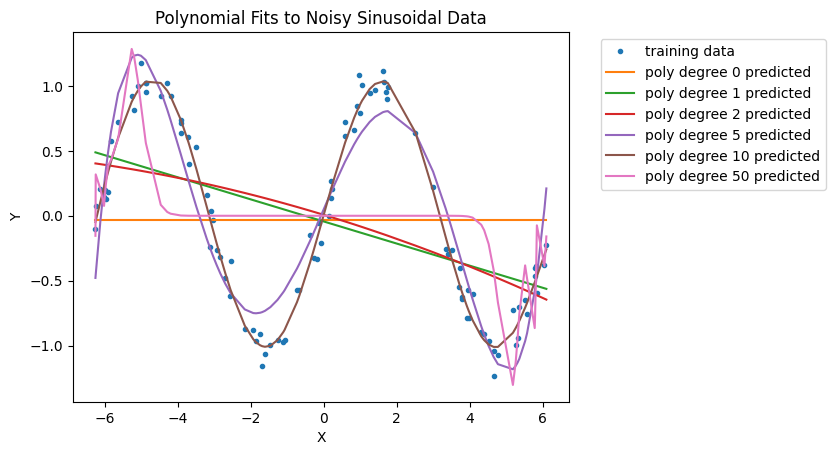

In [ ]:
# Function to expand input for polynomial regression
def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

# Polynomial Regression Class
class PolyRegression(LinearRegression):
    def __init__(self, degree):
        self.degree = degree
        super().__init__(fit_intercept=False)  # Don't fit intercept, as we add the 0-th power explicitly

    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree))

# Sort X to make the plot smooth
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

# Plot the original data
plt.plot(X_sorted, Y_sorted, '.', label='training data')

# Fit and plot polynomial models of different degrees
for degree in [0, 1, 2, 5, 10, 50]:
    model = PolyRegression(degree).fit(X_sorted, Y_sorted)
    plt.plot(X_sorted, model.predict(X_sorted), '-', label=f'poly degree {degree} predicted')

# Plot results
plt.title('Polynomial Fits to Noisy Sinusoidal Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We can see that lower-degree polynomials underfit the data, while higher-degree polynomials overfit it. A polynomial of degree 10 seems to fit the data best. In this case, the challenges of fitting linear data to a nonlinear function arise because the sine function has an infinite Taylor series expansion, which suggests that using more features should yield better results. However, the limited dataset (only 100 samples) leads to overfitting and exact interpolation.